In [1]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_inpu, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target =\
train_test_split(train_scaled, train_target, test_size=0.2)

In [4]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [5]:
model = model_fn()
model.summary()

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ Layer       ┃ Output   ┃ Par… ┃
┃ (type)      ┃ Shape    ┃    # ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ flatten     │ (None,   │    0 │
│ (Flatten)   │ 784)     │      │
├─────────────┼──────────┼──────┤
│ dense       │ (None,   │ 78,… │
│ (Dense)     │ 100)     │      │
├─────────────┼──────────┼──────┤
│ dense_1     │ (None,   │ 1,0… │
│ (Dense)     │ 10)      │      │
└─────────────┴──────────┴──────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
history = model.fit(
    train_scaled, 
    train_target, 
    epochs=20, 
    verbose=0,
    validation_data=(val_scaled, val_target)
)

In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

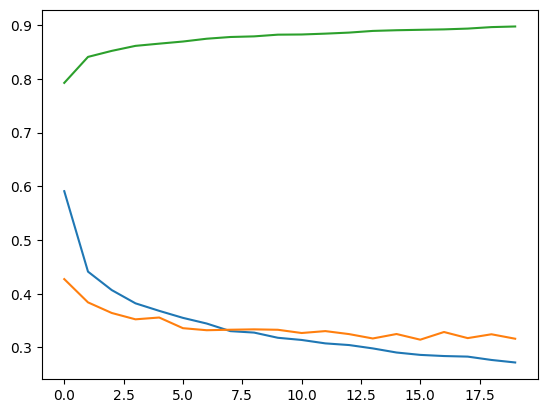

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.show()

In [12]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ Layer       ┃ Output   ┃ Par… ┃
┃ (type)      ┃ Shape    ┃    # ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ flatten_2   │ (None,   │    0 │
│ (Flatten)   │ 784)     │      │
├─────────────┼──────────┼──────┤
│ dense_4     │ (None,   │ 78,… │
│ (Dense)     │ 100)     │      │
├─────────────┼──────────┼──────┤
│ dropout_1   │ (None,   │    0 │
│ (Dropout)   │ 100)     │      │
├─────────────┼──────────┼──────┤
│ dense_5     │ (None,   │ 1,0… │
│ (Dense)     │ 10)      │      │
└─────────────┴──────────┴──────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best_model.keras', 
    save_best_only=True
)

history = model.fit(
    train_scaled, 
    train_target, 
    epochs=20, 
    verbose=0,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb]
)

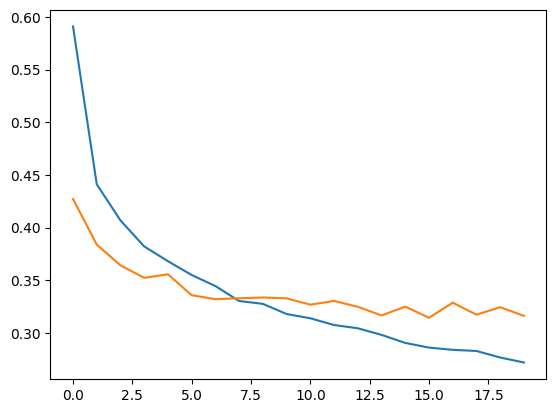

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [19]:
model.save_weights('model.weights.h5')

In [20]:
model.save('mymodel.keras')